In [0]:
# DESCRIPTION : PROGRAM TO CLASSIFY IMAGES .

In [12]:
#LOADING THE DATASET .
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()


Using TensorFlow backend.


In [13]:
#PRINT THE DATATYPE
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [14]:
#GET THE SHAPES OF THE DATA
print('x_train shape:' , x_train.shape)
print('y_train shape:' , y_train.shape)
print('x_test shape:' , x_test.shape)
print('y_test shape:' , y_test.shape)


x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [15]:
#FRIST IMAGE IN THE TRAINING DATASET(AT INDEX=0)
x_train[0]


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

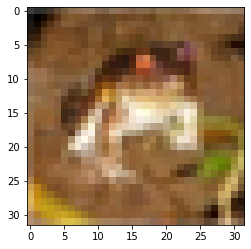

In [16]:
#SHOW IMAGE AS PICTURE
import matplotlib.pyplot as plt
img =plt.imshow(x_train[0])

In [17]:
#LABELLING THE IMAGE 
print('The label is :', y_train[0])

The label is : [6]


In [18]:
#CONVERTING THE LABELS INTO THE SET OF 10 NUMBERS TO INPUT INTO THE NUERAL NETWORK LATER
from keras.utils import to_categorical
y_train_one_hot= to_categorical(y_train)
y_test_one_hot= to_categorical(y_test)

#PRINTING THE NEW LABELS IN THE TRAINING DATASET
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [19]:
#TESTING  THE EXAMPLES OF THE NEW LABELS 
print('The new label is' , y_train_one_hot[0])

The new label is [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [0]:
#NORMALIZE THE PIXELS IN THE IMAGE BETWEEN 0 AND 1
x_train=x_train/255
x_test=x_test/255

In [0]:
#BUILDING THE CNN
from keras.models import Sequential
from keras.layers import Dense ,Flatten, Conv2D ,MaxPooling2D

#CREATING THE ARCHITECTURE 
model=Sequential()

#CONVOLUTIONAL LAYER
model.add(Conv2D(32 ,(5,5), activation='relu' ,input_shape=(32,32,3)))

#MAXPOOLING LAYER
model.add(MaxPooling2D(pool_size=(2,2)))

#CONVOLUTIONAL LAYER
model.add(Conv2D(32 ,(5,5), activation='relu'))

#MAXPOOLING LAYER
model.add(MaxPooling2D(pool_size=(2,2)))




#FLATTEN LAYER TO THE NEURONS
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [0]:
#COMPILE THE MODEL 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
#TRANING THE MODEL
hist=model.fit(x_train,y_train_one_hot, batch_size=256, epochs=10, validation_split=0.3)

Train on 35000 samples, validate on 15000 samples
Epoch 1/10
35000/35000 [==============================] - 49s 1ms/step - loss: 1.7202 - accuracy: 0.3804 - val_loss: 1.4925 - val_accuracy: 0.4553
Epoch 2/10
35000/35000 [==============================] - 49s 1ms/step - loss: 1.3812 - accuracy: 0.5038 - val_loss: 1.3118 - val_accuracy: 0.5347
Epoch 3/10
35000/35000 [==============================] - 49s 1ms/step - loss: 1.2404 - accuracy: 0.5585 - val_loss: 1.2154 - val_accuracy: 0.5711
Epoch 4/10
35000/35000 [==============================] - 49s 1ms/step - loss: 1.1342 - accuracy: 0.5990 - val_loss: 1.1565 - val_accuracy: 0.5934
Epoch 5/10
35000/35000 [==============================] - 49s 1ms/step - loss: 1.0457 - accuracy: 0.6318 - val_loss: 1.1081 - val_accuracy: 0.6109
Epoch 6/10
35000/35000 [==============================] - 49s 1ms/step - loss: 0.9700 - accuracy: 0.6622 - val_loss: 1.0539 - val_accuracy: 0.6325
Epoch 7/10
35000/35000 [==============================] - 49s 1ms/st

In [24]:
#GETTING THE MODEL ACCURACY 
model.evaluate(x_test,y_test_one_hot)[1]

10000/10000 [==============================] - 5s 456us/step


0.6761999726295471

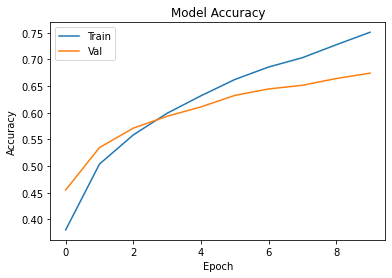

In [25]:
#VISUALIZING THE MODEL ACCURACY 
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper left')
plt.show()

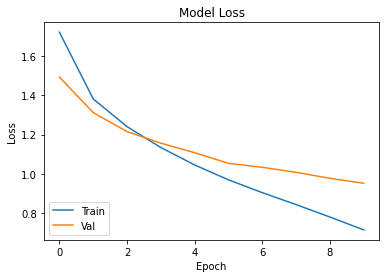

In [26]:
#VISUALIZING THE MODEL LOSS 
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='lower left')
plt.show()

In [40]:
#LOADING THE DATA 
from google.colab import files
uploaded=files.upload()
my_image=plt.imread('dog.jpeg')


Saving dog.jpeg to dog (6).jpeg


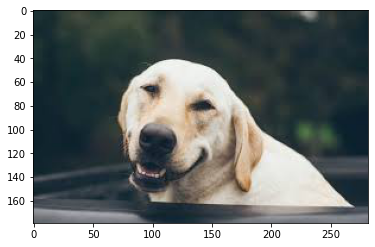

In [41]:
#SHOWING THE UPLOADED IMAGE 
img=plt.imshow(my_image)


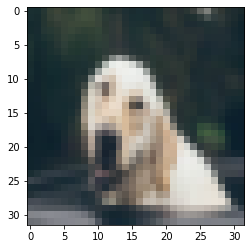

In [42]:
#RESIZING THE IMAGE 
from skimage.transform import resize
my_image_resized=resize(my_image,(32,32,3))
img=plt.imshow(my_image_resized)

In [43]:
#GETTING THE PROBABILITY FOR THE CLASSES IT BELONG
import numpy as np
probabilities=model.predict(np.array([my_image_resized,]))

#PRINTING THE PROBABILITIES
probabilities

array([[7.8420434e-04, 1.1339659e-07, 3.9387625e-02, 7.5659789e-03,
        6.5280159e-04, 8.4758472e-01, 1.6520962e-03, 1.0107989e-01,
        1.2418060e-03, 5.0760857e-05]], dtype=float32)

In [44]:
number_to_class=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
index=np.argsort(probabilities[0,:])
print('Firstlikely class:', number_to_class[index[9]], '--probabilities:' , probabilities[0,index[9]])
print('Second likely class:', number_to_class[index[8]], '--probabilities:' , probabilities[0,index[8]])
print('Third likely class:', number_to_class[index[7]], '--probabilities:' , probabilities[0,index[7]])
print('Fourth likely class:', number_to_class[index[6]], '--probabilities:' , probabilities[0,index[6]])
print('Fifth likely class:', number_to_class[index[5]], '--probabilities:' , probabilities[0,index[5]])
print('Sixthlikely class:', number_to_class[index[4]], '--probabilities:' , probabilities[0,index[4]])
print('Seventh likely class:', number_to_class[index[3]], '--probabilities:' , probabilities[0,index[3]])
print('Eighth likely class:', number_to_class[index[2]], '--probabilities:' , probabilities[0,index[2]])
print('Nineth likely class:', number_to_class[index[1]], '--probabilities:' , probabilities[0,index[1]])
print('Tenth likely class:', number_to_class[index[0]], '--probabilities:' , probabilities[0,index[0]])

Firstlikely class: dog --probabilities: 0.8475847
Second likely class: horse --probabilities: 0.10107989
Third likely class: bird --probabilities: 0.039387625
Fourth likely class: cat --probabilities: 0.007565979
Fifth likely class: frog --probabilities: 0.0016520962
Sixthlikely class: ship --probabilities: 0.001241806
Seventh likely class: airplane --probabilities: 0.00078420434
Eighth likely class: deer --probabilities: 0.0006528016
Nineth likely class: truck --probabilities: 5.0760857e-05
Tenth likely class: automobile --probabilities: 1.1339659e-07


In [0]:
#Saving the model
model.save('Image Classifier')

In [0]:
#Loading the model 
from keras.models import load_model
model=load_model('Image Classifier')